# <span style="color:blue"><ins> Mobile price classification </ins></span>

Authors: <ins>*Alessio Franchi, Manuel Naviglio*</ins>

The aim of this notebook is to explore and analize the mobile-phones dataset to get new useful insights.
The mobile_price dataset contains **20** features:

0. **battery_power** : Total energy a battery can store in one time measured in mAh
1. **blue** : Has bluetooth or not
2. **clock_speed** : Speed at which microprocessor executes instructions
3. **dual_sim** : Has dual sim support or not
4. **fc** : Front Camera mega pixels
5. **four_g** : Has 4G or not
6. **int_memory** : Internal Memory in Gigabytes
7. **m_dep** : Mobile Depth in cm
<img src="https://cdn.pixabay.com/photo/2016/12/09/11/33/smartphone-1894723_960_720.jpg" align="right" width="420" height="620">
8. **mobile_wt** : Weight of mobile phone
9. **n_cores** : Number of cores of processor
10. **pc** : Primary Camera mega pixels
11. **px_height** : Pixel Resolution Height
12. **px_width** : Pixel Resolution Width
13. **ram** : Random Access Memory in Megabytes
14. **sc_h** : Screen Height of mobile in cm
15. **sc_w** : Screen Width of mobile in cm
16. **talk_time** : Longest time that a single battery charge will last when you are
17. **three_g** : Has 3G or not
18. **touch_screen** : Has touch screen or not
19. **wifi** : Has wifi or not
20. **price_range** : Price range of the mobile



In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns    # visualization library
%matplotlib inline

# remove python warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
data = pd.read_csv('mobile_price_classification.csv')

In [3]:
# main info and describe
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


There are no **missing values**, and all the data have a numerical type, either **int64** or **float64**.

Before visualizing the data, we **hold-out** a **validation** dataset. This set would be useful to test our models after the analyses.

In [4]:
# import StratifiedShuffleSplit to divide the dataset indices into two stratified sets
from sklearn.model_selection import StratifiedShuffleSplit

# select the indices to construct the train and validation datasets
train_indices, val_indices = list(StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=101).split(data.drop('price_range', axis=1), data['price_range']))[0]

# construct train and validation sets by passing the indices found
train, val = data.loc[train_indices], data.loc[val_indices]

# Data visualization

From this moment on, we only focus on the train dataset to explore the data. We now take a look at the distributions of all the features. 

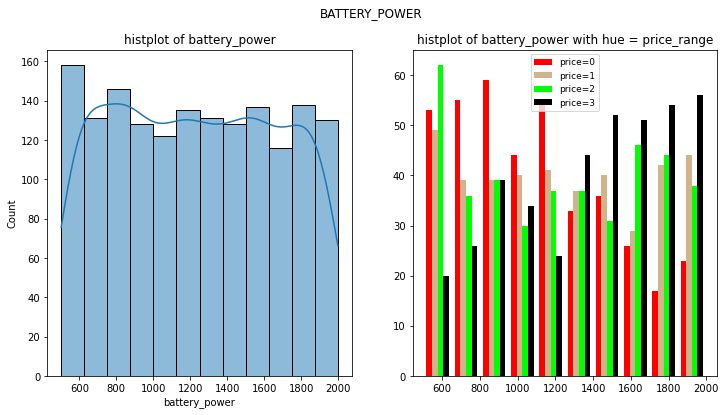

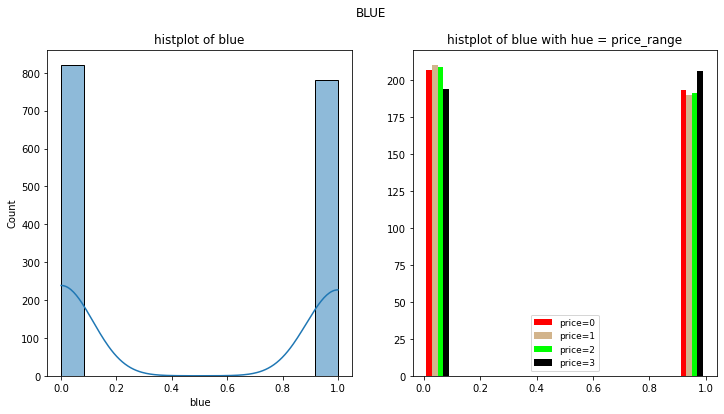

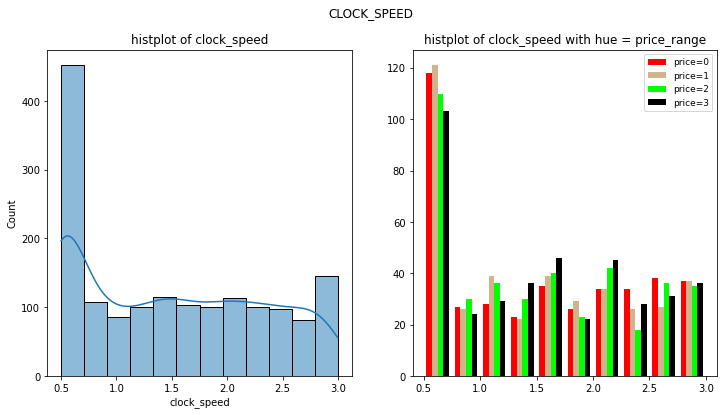

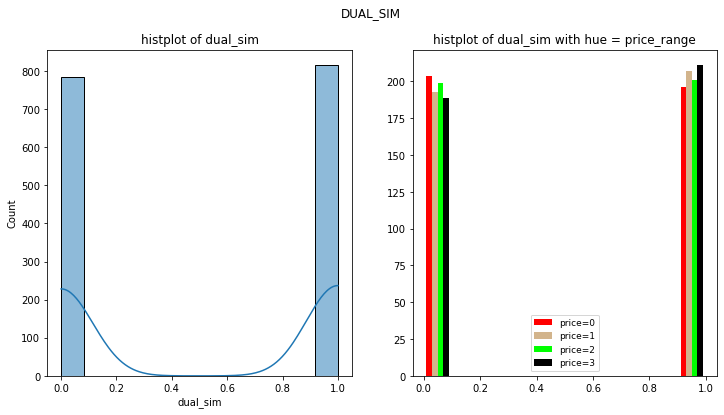

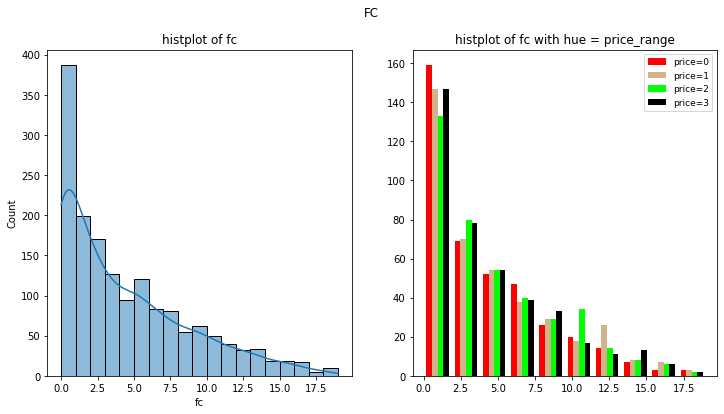

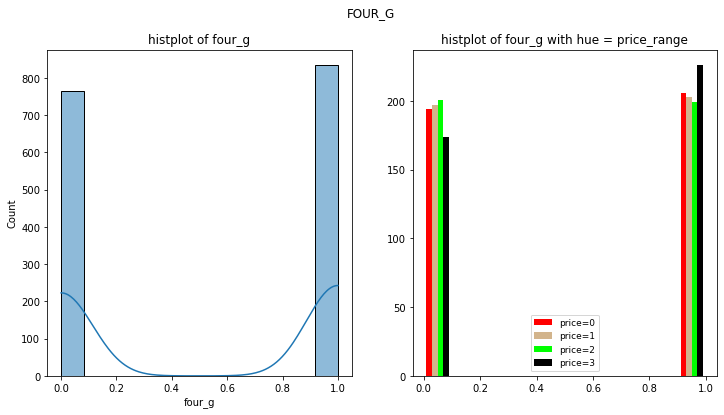

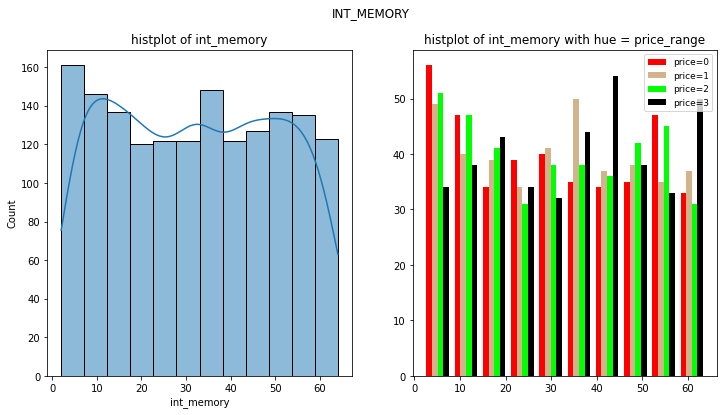

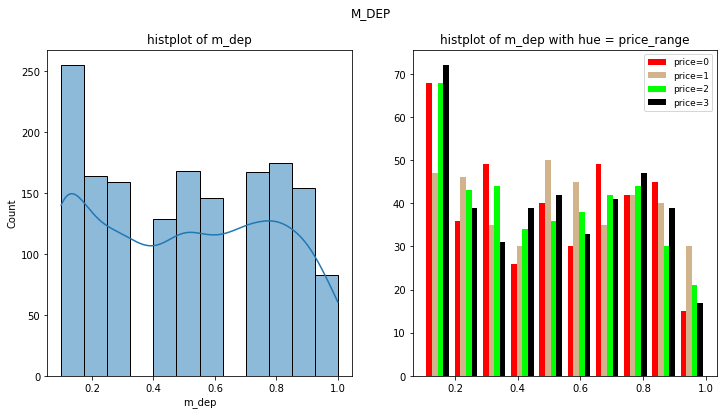

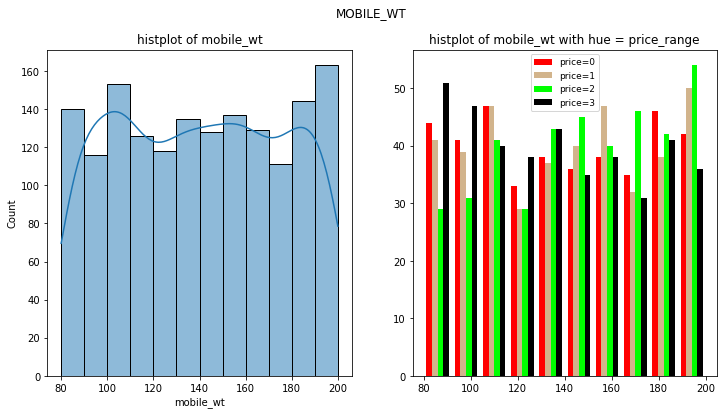

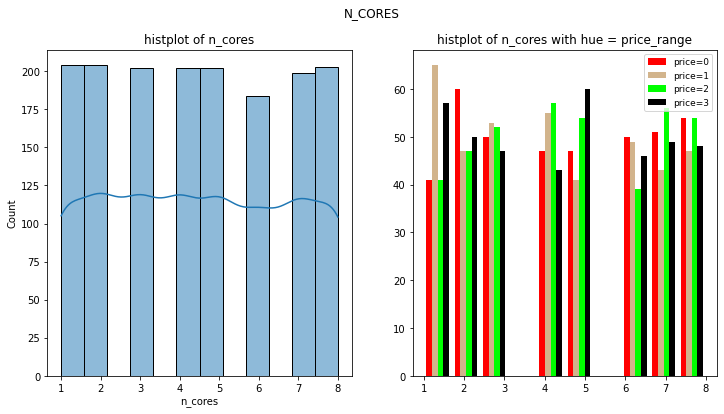

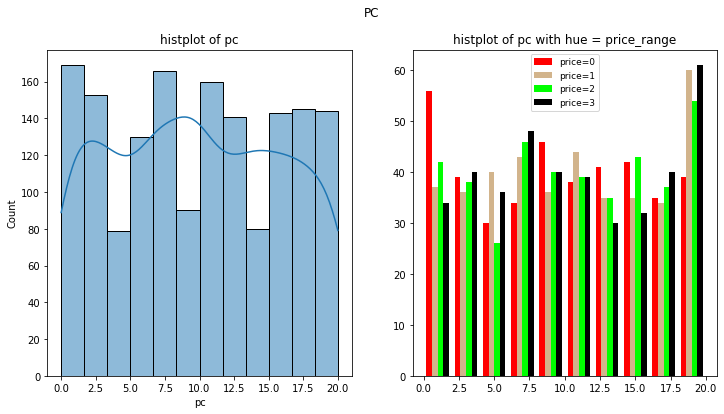

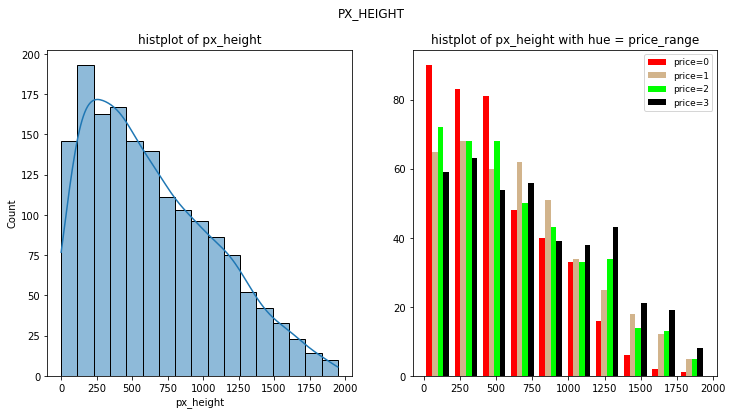

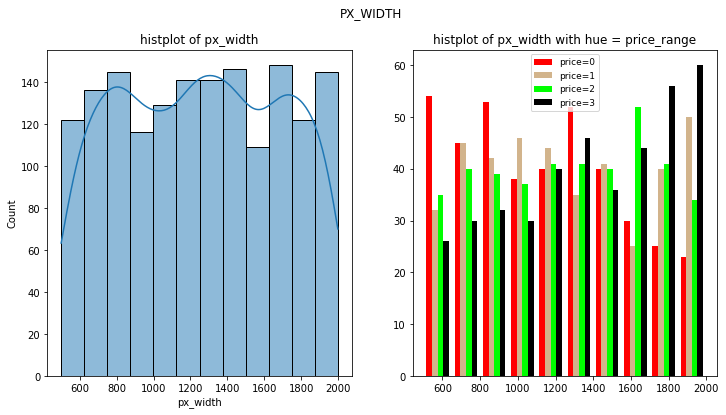

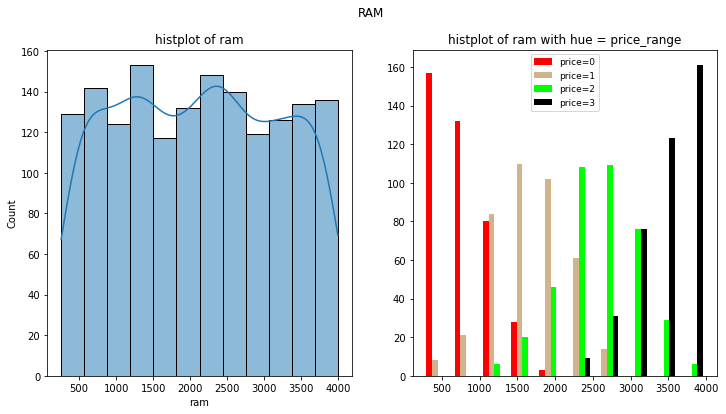

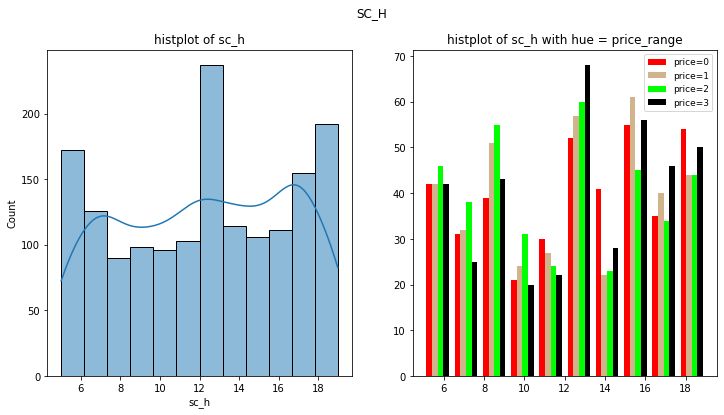

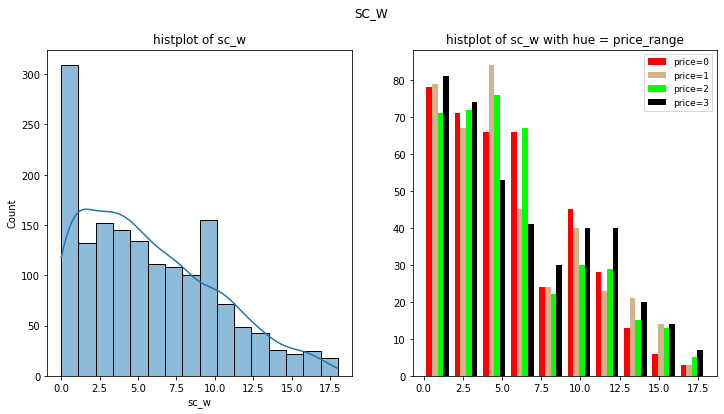

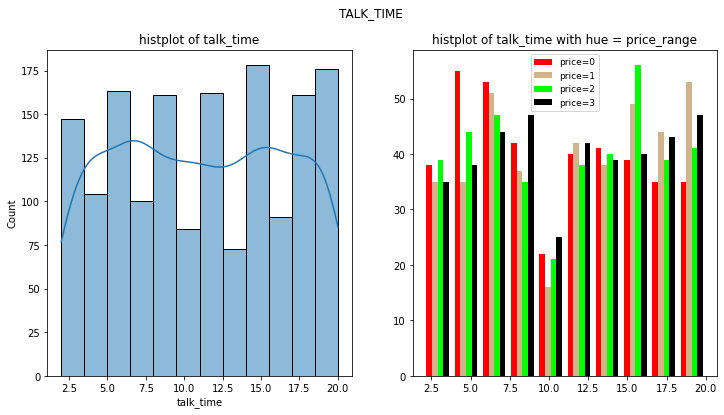

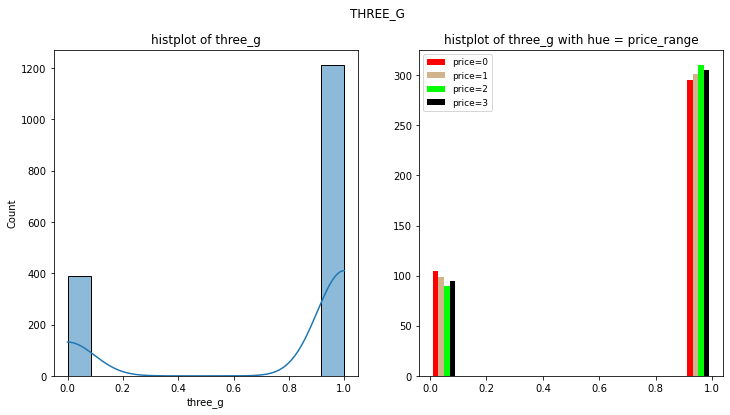

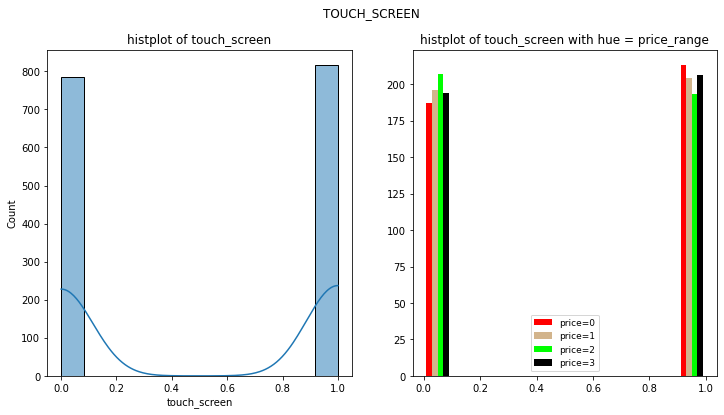

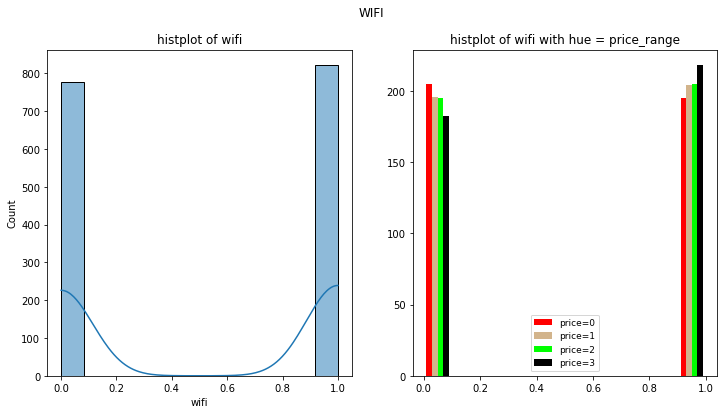

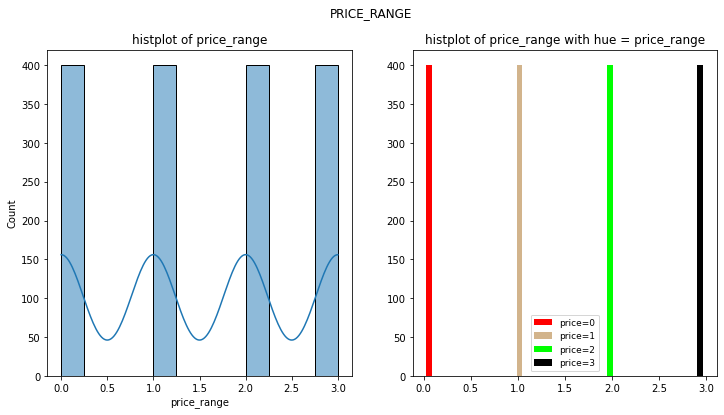

In [5]:
# cycle over all columns apart from the target (price_range)
for col in train.columns:
    # create a 1 X 2 subplot
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    
    # overall title
    fig.suptitle(col.upper())
    
    # LEFT plot, histograms of the feature 
    ax.ravel()[0].set_title('histplot of '+ col)
    sns.histplot(data=train, x=col, kde=True, ax=ax.ravel()[0])
    
    # RIGHT plot, histograms of the feature with hue = mobile price
    # create a temporary variable containing the feature under analysis grouped by price_range
    temp = [train[train['price_range'] == 0][col], train[train['price_range'] == 1][col], train[train['price_range'] == 2][col], train[train['price_range'] == 3][col]]
    # choose 4 flashy colors
    colors = ['red', 'tan', 'lime', 'black']
    # plot in the right plot the distributions grouped by 'price_range'
    ax.ravel()[1].set_title('histplot of '+ col +' with hue = price_range')
    ax.ravel()[1].hist(temp, density=False, histtype='bar', color=colors, label=['price='+str(i) for i in range(4)])
    plt.legend(loc='best', fontsize=9)

<ins>Observations</ins>:
1. Looking at the feature distributions, the most relevant variable to determine the price ranges is the **ram** followed by the **battery power**.
2. Many features follow a uniform-like distributions, while others are more skewed (**fc**, **px_height**, **sc_w**) 

## Standardize the data

In [6]:
# import both StandardScaler and MinMaxScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# select a scaler and standardize the data
scaler = StandardScaler()
# make a copy of the target
y_train = train['price_range'].copy()
y_val = train['price_range'].copy()

# save the column names and indices
indices_train = train.index.copy()
indices_val = val.index.copy()
columns_names = train.drop('price_range', axis=1).columns # these are the same for both train and val

# fit and transform the scaler
x_train = pd.DataFrame(scaler.fit_transform(train.drop('price_range', axis=1)), columns=columns_names, index=indices_train)
x_val = pd.DataFrame(scaler.transform(val.drop('price_range', axis=1)), columns=columns_names, index=indices_val)

# K-means

*************************************
Cluster 10: inertia=24755.519527916374 and avg_silhouette_score=0.04799792005448552



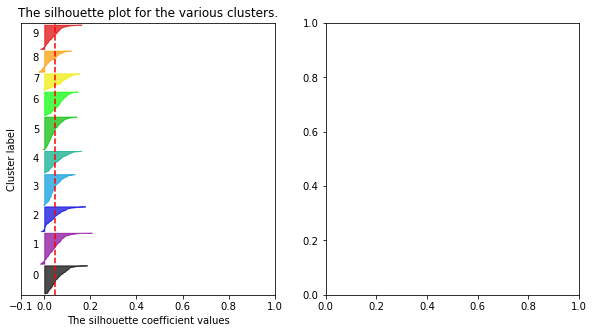

*************************************
Cluster 11: inertia=24494.961217801305 and avg_silhouette_score=0.046846454755495405



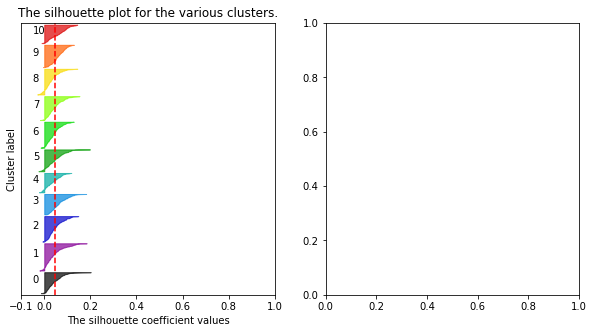

*************************************
Cluster 12: inertia=24206.66277012208 and avg_silhouette_score=0.04752760123391933



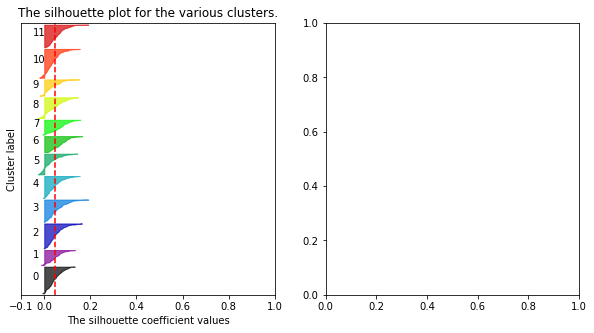

*************************************
Cluster 13: inertia=23966.74123581983 and avg_silhouette_score=0.047422965566022074



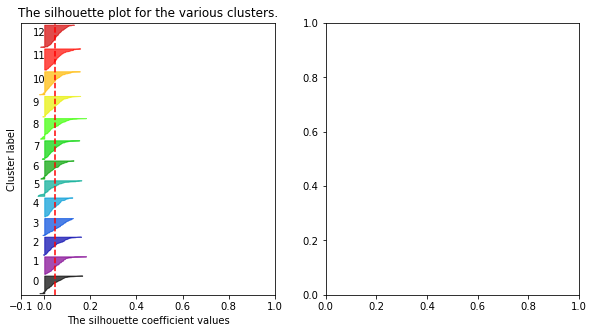

*************************************
Cluster 14: inertia=23750.765218539233 and avg_silhouette_score=0.048120656058230155



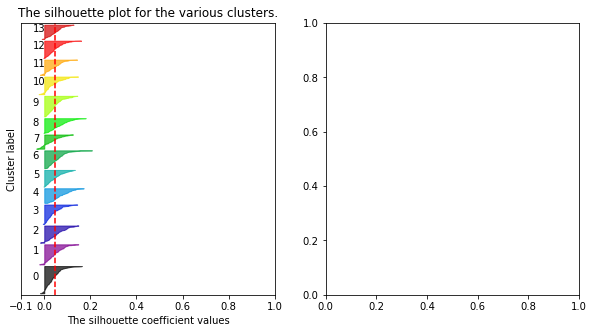

*************************************
Cluster 15: inertia=23524.994122396376 and avg_silhouette_score=0.047570860453188805



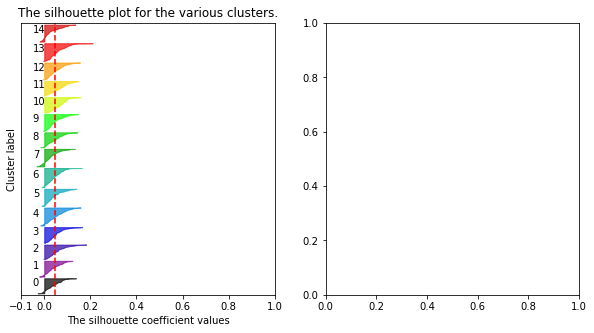

*************************************
Cluster 16: inertia=23343.539369276994 and avg_silhouette_score=0.04815281904409873



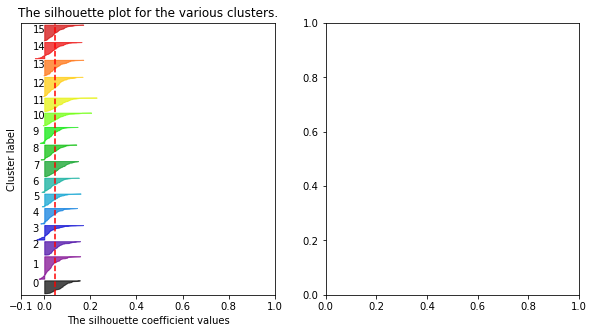

*************************************
Cluster 17: inertia=23132.090923886302 and avg_silhouette_score=0.048960627238073345



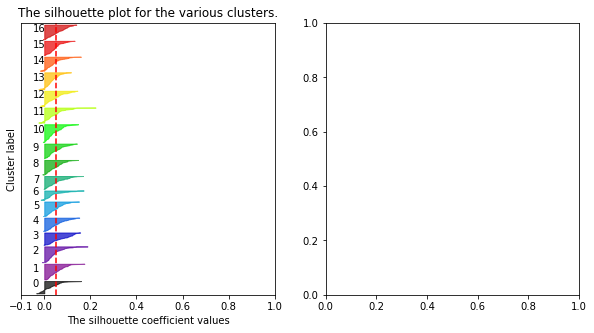

*************************************
Cluster 18: inertia=22953.271076345118 and avg_silhouette_score=0.0475013519654372



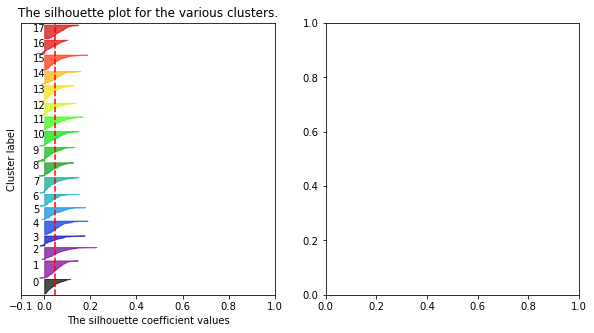

*************************************
Cluster 19: inertia=22778.231008839583 and avg_silhouette_score=0.04866059106368741



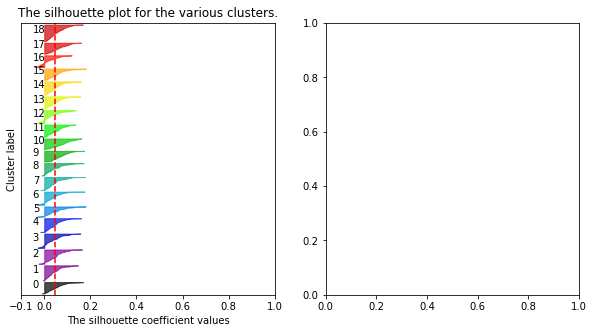

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# number of clusters
clusters = [x for x in range(10, 20, 1)]

# store the results in a dictionary
kmeans_results = {'n_cluster':[], 'silhouette_score':[], 'inertia':[]}

# find the optimal number of clusters
for clus in clusters:
    # select the model
    model = KMeans(n_clusters=clus, n_init=100, random_state=101, max_iter=1000)
    # fit the model using the train dataset
    model.fit(x_train)
    
    # append and print the results
    print("*************************************")
    print(f"Cluster {clus}: inertia={model.inertia_} and avg_silhouette_score={silhouette_score(x_train, model.labels_)}\n")
    
    kmeans_results['n_cluster'].append(clus)
    kmeans_results['inertia'].append(model.inertia_)
    kmeans_results['silhouette_score'].append(silhouette_score(x_train, model.labels_))
    
    
    # *** Subplots ***
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # *** Subplot1 ***: silhouette knife plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.3, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_train.index) + (clus + 1) * 10])
    # silhouette avg
    silhouette_avg = silhouette_score(x_train, model.labels_)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_train, model.labels_)
    
    # from sklearn documentation -> to create the silhouette plot
    y_lower = 10
    for i in range(clus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[model.labels_ == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / clus)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    